In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# For this ML Project the file we have chosen is the data on Indian Startups          # Funding since 2015.
# India has the 3rd largest startup ecosystem in the world.
# There are 115 unicorns startups in India.

In [46]:
df=pd.read_excel("startup_funding.xlsx")
df

Sr No      Date dd/mm/yyyy                  Startup Name  \
0         1  2020-01-09 00:00:00                        BYJU’S   
1         2  2020-01-13 00:00:00                        Shuttl   
2         3  2020-01-09 00:00:00                     Mamaearth   
3         4  2020-01-02 00:00:00  https://www.wealthbucket.in/   
4         5  2020-01-02 00:00:00                        Fashor   
...     ...                  ...                           ...   
3039   3040  2015-01-29 00:00:00                    Printvenue   
3040   3041  2015-01-29 00:00:00                      Graphene   
3041   3042  2015-01-30 00:00:00                Mad Street Den   
3042   3043  2015-01-30 00:00:00                     Simplotel   
3043   3044  2015-01-31 00:00:00              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler products   
3                 FinTech                      Online Investment   
4     Fashion and Apparel            Embroiled Clothes For Women   
...                   ...                                    ...   
3039                  NaN                                    NaN   
3040                  NaN                                    NaN   
3041                  NaN                                    NaN   
3042                  NaN                                    NaN   
3043                  NaN                                    NaN   

     City  Location                     Investors Name       InvestmentnType  \
0         Bengaluru            Tiger Global Management  Private Equity Round   
1           Gurgaon          Susquehanna Growth Equity              Series C   
2         Bengaluru              Sequoia Capital India              Series B   
3         New Delhi                     Vinod Khatumal          Pre-series A   
4            Mumbai            Sprout Venture Partners            Seed Round   
...             ...                                ...                   ...   
3039            NaN        Asia Pacific Internet Group        Private Equity   
3040            NaN                     KARSEMVEN Fund        Private Equity   
3041            NaN     Exfinity Fund, GrowX Ventures.        Private Equity   
3042            NaN                         MakeMyTrip        Private Equity   
3043            NaN  UK based Group of Angel Investors          Seed Funding   

     Amount in USD                            Remarks  
0        200000000                                NaN  
1          8048394                                NaN  
2         18358860                                NaN  
3          3000000                                NaN  
4          1800000                                NaN  
...            ...                                ...  
3039       4500000                                NaN  
3040        825000                Govt backed VC Fund  
3041       1500000                                NaN  
3042           NaN  Strategic Funding, Minority stake  
3043        140000                                NaN  

[3044 rows x 10 columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2080 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [48]:
df.describe()

Sr No
count  3044.000000
mean   1522.500000
std     878.871435
min       1.000000
25%     761.750000
50%    1522.500000
75%    2283.250000
max    3044.000000

In [49]:
df.drop(columns=df.columns[0],axis=1,inplace=True)
# We will drop the column Sr. No.

In [50]:
df

Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0     2020-01-09 00:00:00                        BYJU’S               E-Tech   
1     2020-01-13 00:00:00                        Shuttl       Transportation   
2     2020-01-09 00:00:00                     Mamaearth           E-commerce   
3     2020-01-02 00:00:00  https://www.wealthbucket.in/              FinTech   
4     2020-01-02 00:00:00                        Fashor  Fashion and Apparel   
...                   ...                           ...                  ...   
3039  2015-01-29 00:00:00                    Printvenue                  NaN   
3040  2015-01-29 00:00:00                      Graphene                  NaN   
3041  2015-01-30 00:00:00                Mad Street Den                  NaN   
3042  2015-01-30 00:00:00                     Simplotel                  NaN   
3043  2015-01-31 00:00:00              couponmachine.in                  NaN   

                                SubVertical City  Location  \
0                                E-learning      Bengaluru   
1                 App based shuttle service        Gurgaon   
2     Retailer of baby and toddler products      Bengaluru   
3                         Online Investment      New Delhi   
4               Embroiled Clothes For Women         Mumbai   
...                                     ...            ...   
3039                                    NaN            NaN   
3040                                    NaN            NaN   
3041                                    NaN            NaN   
3042                                    NaN            NaN   
3043                                    NaN            NaN   

                         Investors Name       InvestmentnType Amount in USD  \
0               Tiger Global Management  Private Equity Round     200000000   
1             Susquehanna Growth Equity              Series C       8048394   
2                 Sequoia Capital India              Series B      18358860   
3                        Vinod Khatumal          Pre-series A       3000000   
4               Sprout Venture Partners            Seed Round       1800000   
...                                 ...                   ...           ...   
3039        Asia Pacific Internet Group        Private Equity       4500000   
3040                     KARSEMVEN Fund        Private Equity        825000   
3041     Exfinity Fund, GrowX Ventures.        Private Equity       1500000   
3042                         MakeMyTrip        Private Equity           NaN   
3043  UK based Group of Angel Investors          Seed Funding        140000   

                                Remarks  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  
...                                 ...  
3039                                NaN  
3040                Govt backed VC Fund  
3041                                NaN  
3042  Strategic Funding, Minority stake  
3043                                NaN  

[3044 rows x 9 columns]

In [51]:
df.drop(columns=df.columns[-1],axis=1,inplace=True)
# We will drop the column Remarks 

In [52]:
df

Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0     2020-01-09 00:00:00                        BYJU’S               E-Tech   
1     2020-01-13 00:00:00                        Shuttl       Transportation   
2     2020-01-09 00:00:00                     Mamaearth           E-commerce   
3     2020-01-02 00:00:00  https://www.wealthbucket.in/              FinTech   
4     2020-01-02 00:00:00                        Fashor  Fashion and Apparel   
...                   ...                           ...                  ...   
3039  2015-01-29 00:00:00                    Printvenue                  NaN   
3040  2015-01-29 00:00:00                      Graphene                  NaN   
3041  2015-01-30 00:00:00                Mad Street Den                  NaN   
3042  2015-01-30 00:00:00                     Simplotel                  NaN   
3043  2015-01-31 00:00:00              couponmachine.in                  NaN   

                                SubVertical City  Location  \
0                                E-learning      Bengaluru   
1                 App based shuttle service        Gurgaon   
2     Retailer of baby and toddler products      Bengaluru   
3                         Online Investment      New Delhi   
4               Embroiled Clothes For Women         Mumbai   
...                                     ...            ...   
3039                                    NaN            NaN   
3040                                    NaN            NaN   
3041                                    NaN            NaN   
3042                                    NaN            NaN   
3043                                    NaN            NaN   

                         Investors Name       InvestmentnType Amount in USD  
0               Tiger Global Management  Private Equity Round     200000000  
1             Susquehanna Growth Equity              Series C       8048394  
2                 Sequoia Capital India              Series B      18358860  
3                        Vinod Khatumal          Pre-series A       3000000  
4               Sprout Venture Partners            Seed Round       1800000  
...                                 ...                   ...           ...  
3039        Asia Pacific Internet Group        Private Equity       4500000  
3040                     KARSEMVEN Fund        Private Equity        825000  
3041     Exfinity Fund, GrowX Ventures.        Private Equity       1500000  
3042                         MakeMyTrip        Private Equity           NaN  
3043  UK based Group of Angel Investors          Seed Funding        140000  

[3044 rows x 8 columns]

In [53]:
df["Amount in USD"].replace("undisclosed",np.nan,inplace=True)

In [54]:
df["Amount in USD"].replace("unknown",np.nan,inplace=True)

In [55]:
df["Amount in USD"].replace("Undisclosed",np.nan,inplace=True)
# We have values such as "undisclosed","unknown" and "Undisclosed" with null

In [56]:
df["Amount in USD"].astype("float64")
# We will convert the column 'Amount in USD' from object to float64

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            NaN
3043       140000.0
Name: Amount in USD, Length: 3044, dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date dd/mm/yyyy    3044 non-null   object 
 1   Startup Name       3044 non-null   object 
 2   Industry Vertical  2873 non-null   object 
 3   SubVertical        2108 non-null   object 
 4   City  Location     2864 non-null   object 
 5   Investors Name     3020 non-null   object 
 6   InvestmentnType    3040 non-null   object 
 7   Amount in USD      2073 non-null   float64
dtypes: float64(1), object(7)
memory usage: 190.4+ KB


In [58]:
df.describe()

Amount in USD
count   2.073000e+03
mean    1.840034e+07
std     1.211407e+08
min     1.600000e+04
25%     4.860000e+05
50%     1.750000e+06
75%     8.000000e+06
max     3.900000e+09

In [59]:
df["Amount in USD"].value_counts()

1000000.0      166
500000.0       108
2000000.0       69
5000000.0       67
3000000.0       66
              ... 
270000000.0      1
329230.0         1
692000.0         1
8250000.0        1
3250000.0        1
Name: Amount in USD, Length: 457, dtype: int64

In [60]:
df["City  Location"].value_counts()

Bangalore             701
Mumbai                568
New Delhi             424
Gurgaon               291
Bengaluru             141
                     ... 
Burnsville              1
Hubli                   1
Kerala                  1
Kozhikode               1
Dallas / Hyderabad      1
Name: City  Location, Length: 107, dtype: int64

In [61]:
df["Industry Vertical"].value_counts()

Consumer Internet                        941
Technology                               478
eCommerce                                186
Healthcare                                70
Finance                                   62
                                        ... 
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
on-demand healthcare marketplace           1
Online Travel Marketplace                  1
Name: Industry Vertical, Length: 821, dtype: int64

In [62]:
df.isnull().sum()   # To find the null values

Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical    171
SubVertical          936
City  Location       180
Investors Name        24
InvestmentnType        4
Amount in USD        971
dtype: int64

In [63]:
amount_in_usd_mean=df["Amount in USD"].mean()

In [64]:
df["Amount in USD"].fillna(amount_in_usd_mean,inplace=True)
# We have replace the null value in the column with the mean value of the column

In [65]:
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [66]:
df

Startup Name    Industry Vertical  \
0                           BYJU’S               E-Tech   
1                           Shuttl       Transportation   
2                        Mamaearth           E-commerce   
3     https://www.wealthbucket.in/              FinTech   
4                           Fashor  Fashion and Apparel   
...                            ...                  ...   
3039                    Printvenue                  NaN   
3040                      Graphene                  NaN   
3041                Mad Street Den                  NaN   
3042                     Simplotel                  NaN   
3043              couponmachine.in                  NaN   

                                SubVertical City  Location  \
0                                E-learning      Bengaluru   
1                 App based shuttle service        Gurgaon   
2     Retailer of baby and toddler products      Bengaluru   
3                         Online Investment      New Delhi   
4               Embroiled Clothes For Women         Mumbai   
...                                     ...            ...   
3039                                    NaN            NaN   
3040                                    NaN            NaN   
3041                                    NaN            NaN   
3042                                    NaN            NaN   
3043                                    NaN            NaN   

                         Investors Name       InvestmentnType  Amount in USD  
0               Tiger Global Management  Private Equity Round   2.000000e+08  
1             Susquehanna Growth Equity              Series C   8.048394e+06  
2                 Sequoia Capital India              Series B   1.835886e+07  
3                        Vinod Khatumal          Pre-series A   3.000000e+06  
4               Sprout Venture Partners            Seed Round   1.800000e+06  
...                                 ...                   ...            ...  
3039        Asia Pacific Internet Group        Private Equity   4.500000e+06  
3040                     KARSEMVEN Fund        Private Equity   8.250000e+05  
3041     Exfinity Fund, GrowX Ventures.        Private Equity   1.500000e+06  
3042                         MakeMyTrip        Private Equity   1.840034e+07  
3043  UK based Group of Angel Investors          Seed Funding   1.400000e+05  

[3044 rows x 7 columns]

In [67]:
df.isnull().sum()

Startup Name           0
Industry Vertical    171
SubVertical          936
City  Location       180
Investors Name        24
InvestmentnType        4
Amount in USD          0
dtype: int64

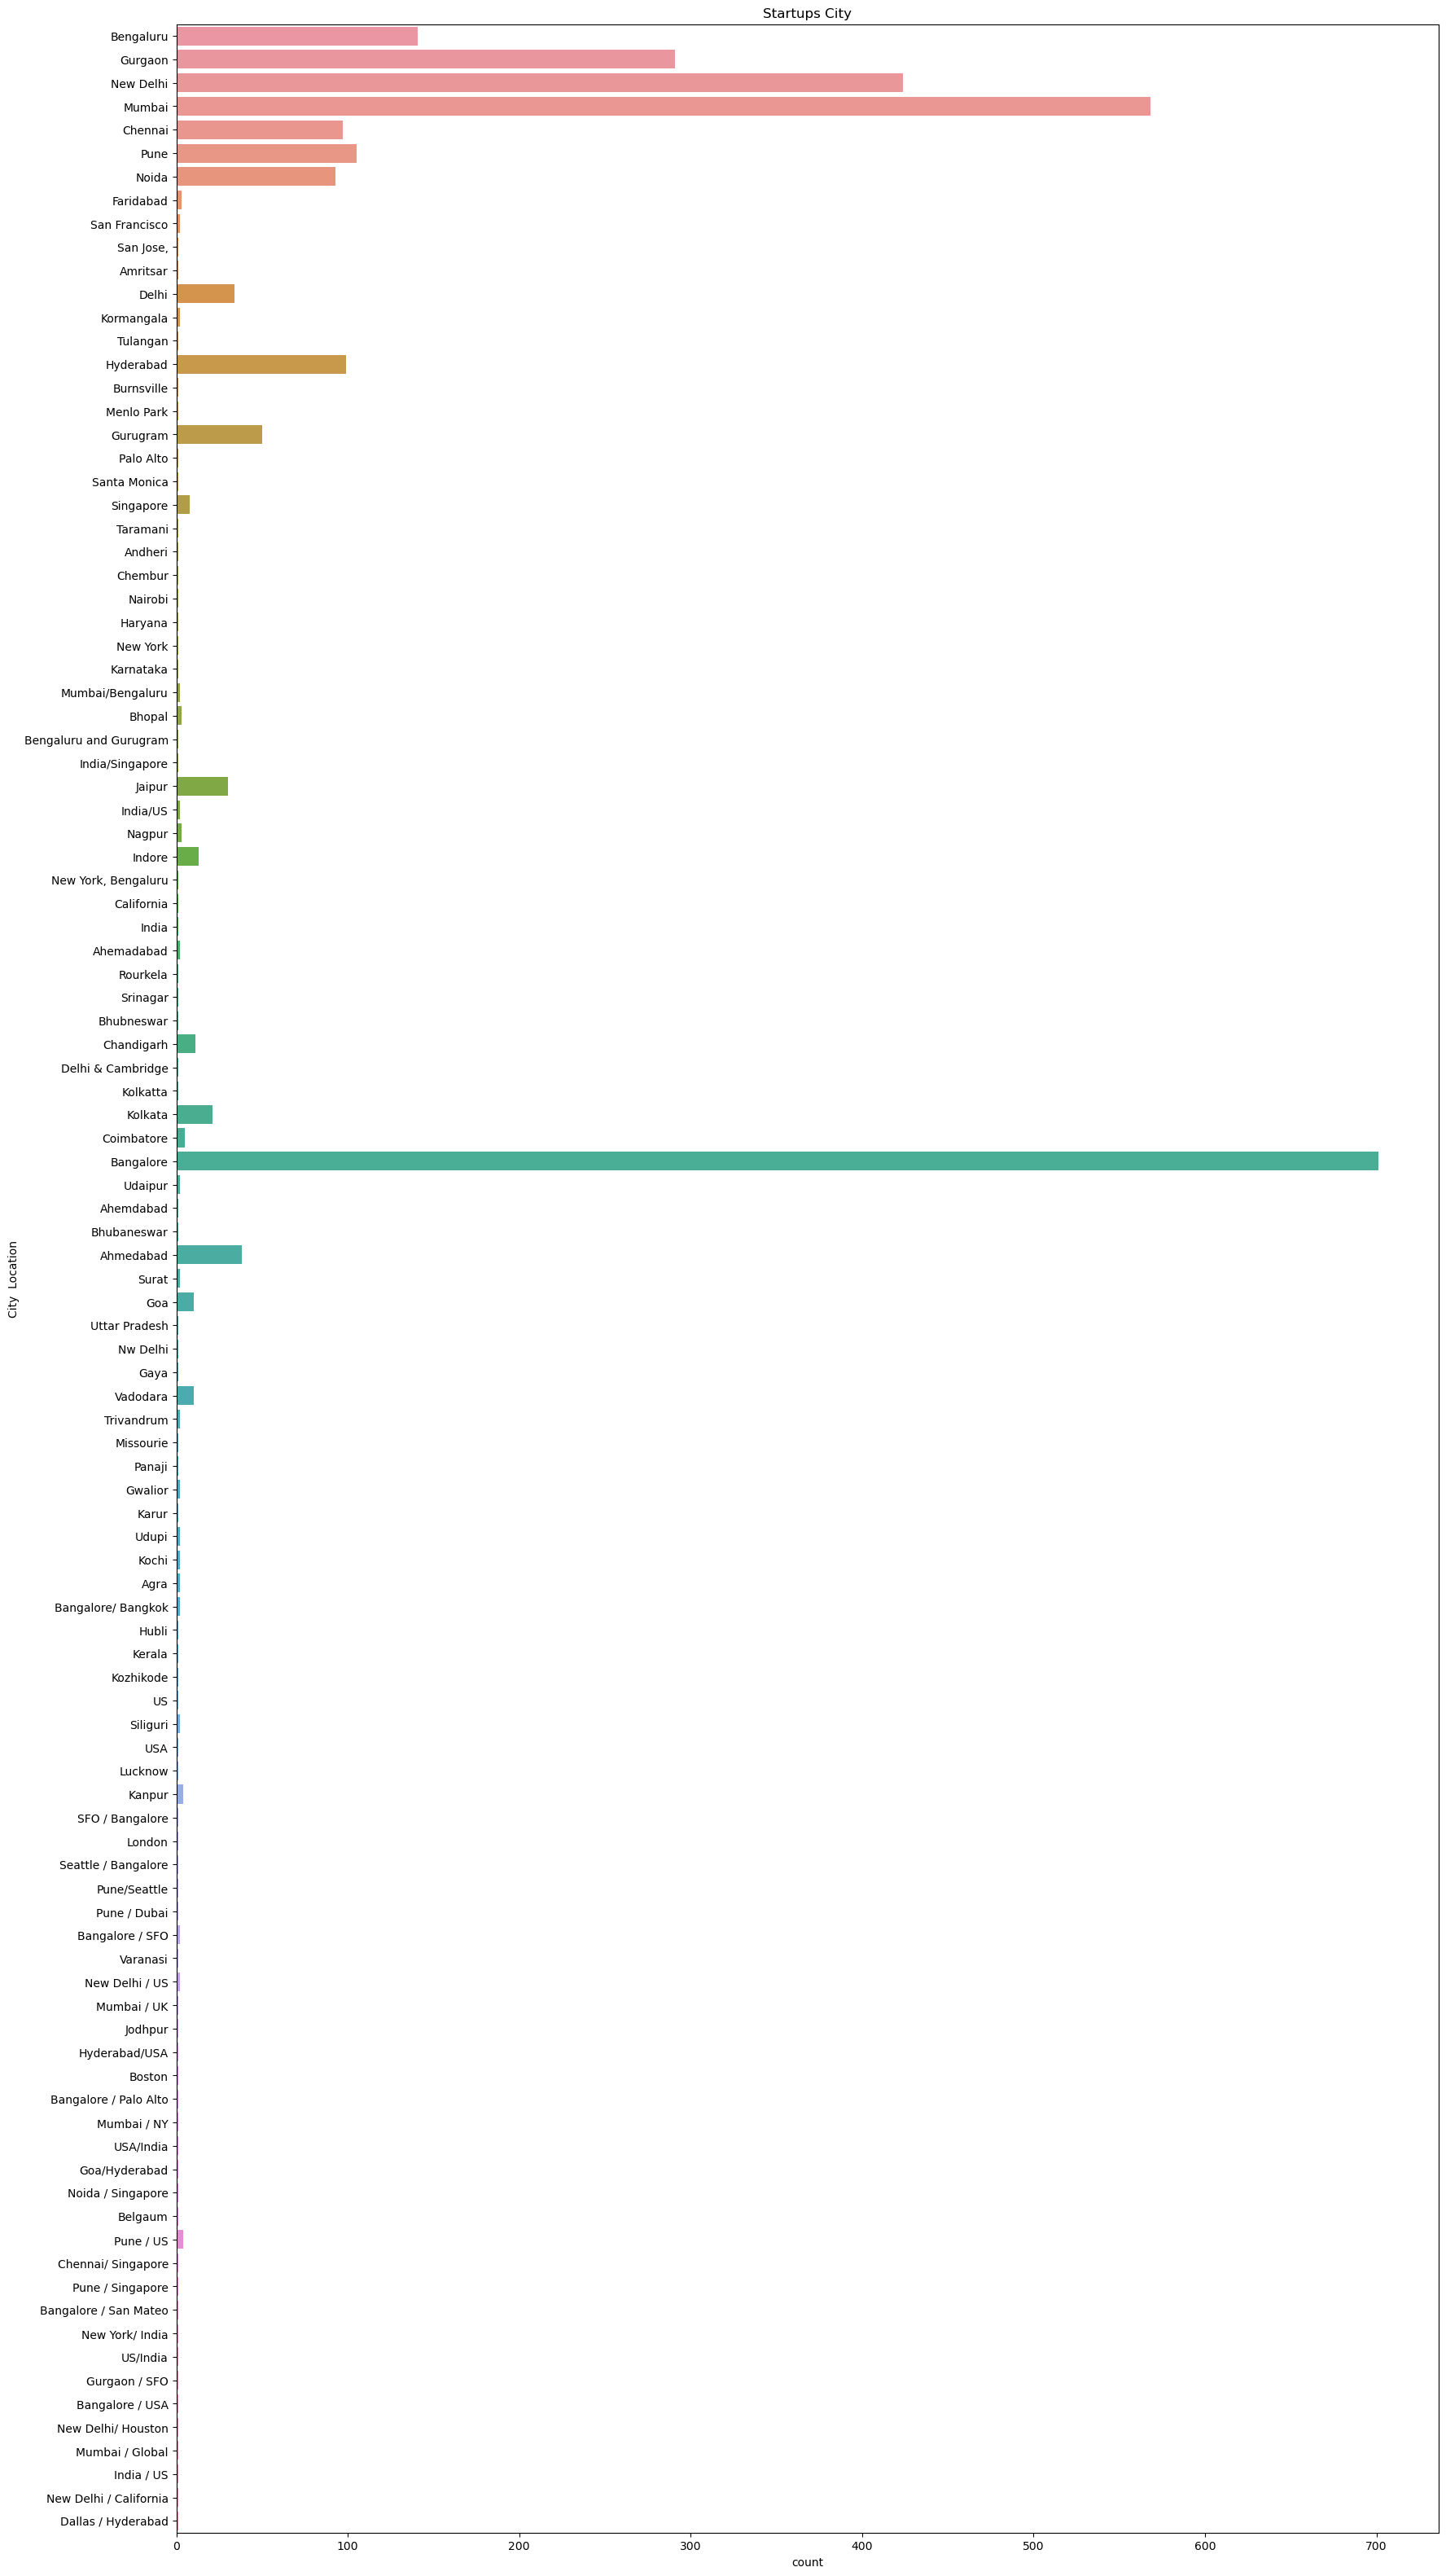

In [68]:
plt.figure(figsize=(20,40))
sns.countplot(data=df,y="City  Location")
plt.title("Startups City")
plt.show()

In [69]:
# From the above graph we come to know that Bangalore city rank No. 1 in startups, or the most number of startups are from 
# Bangalore. Followed by Bangalore are Mumbai, New Delhi, Gurgaon and Bengaluru.

In [70]:
df["InvestmentnType"].value_counts()

Private Equity                 1357
Seed Funding                   1355
Seed/ Angel Funding             133
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Pre-Series A                      4
Private Equity Round              4
Seed                              4
Corporate Round                   2
Equity                            2
Series E                          2
Venture Round                     2
Series F                          2
pre-Series A                      2
Debt-Funding                      1
Crowd funding                     1
Mezzanine                         1
Series B (Extension)              1
Angel Funding                     1
Equity Based Funding              1
Private\\nEquity                  1
Seed funding                

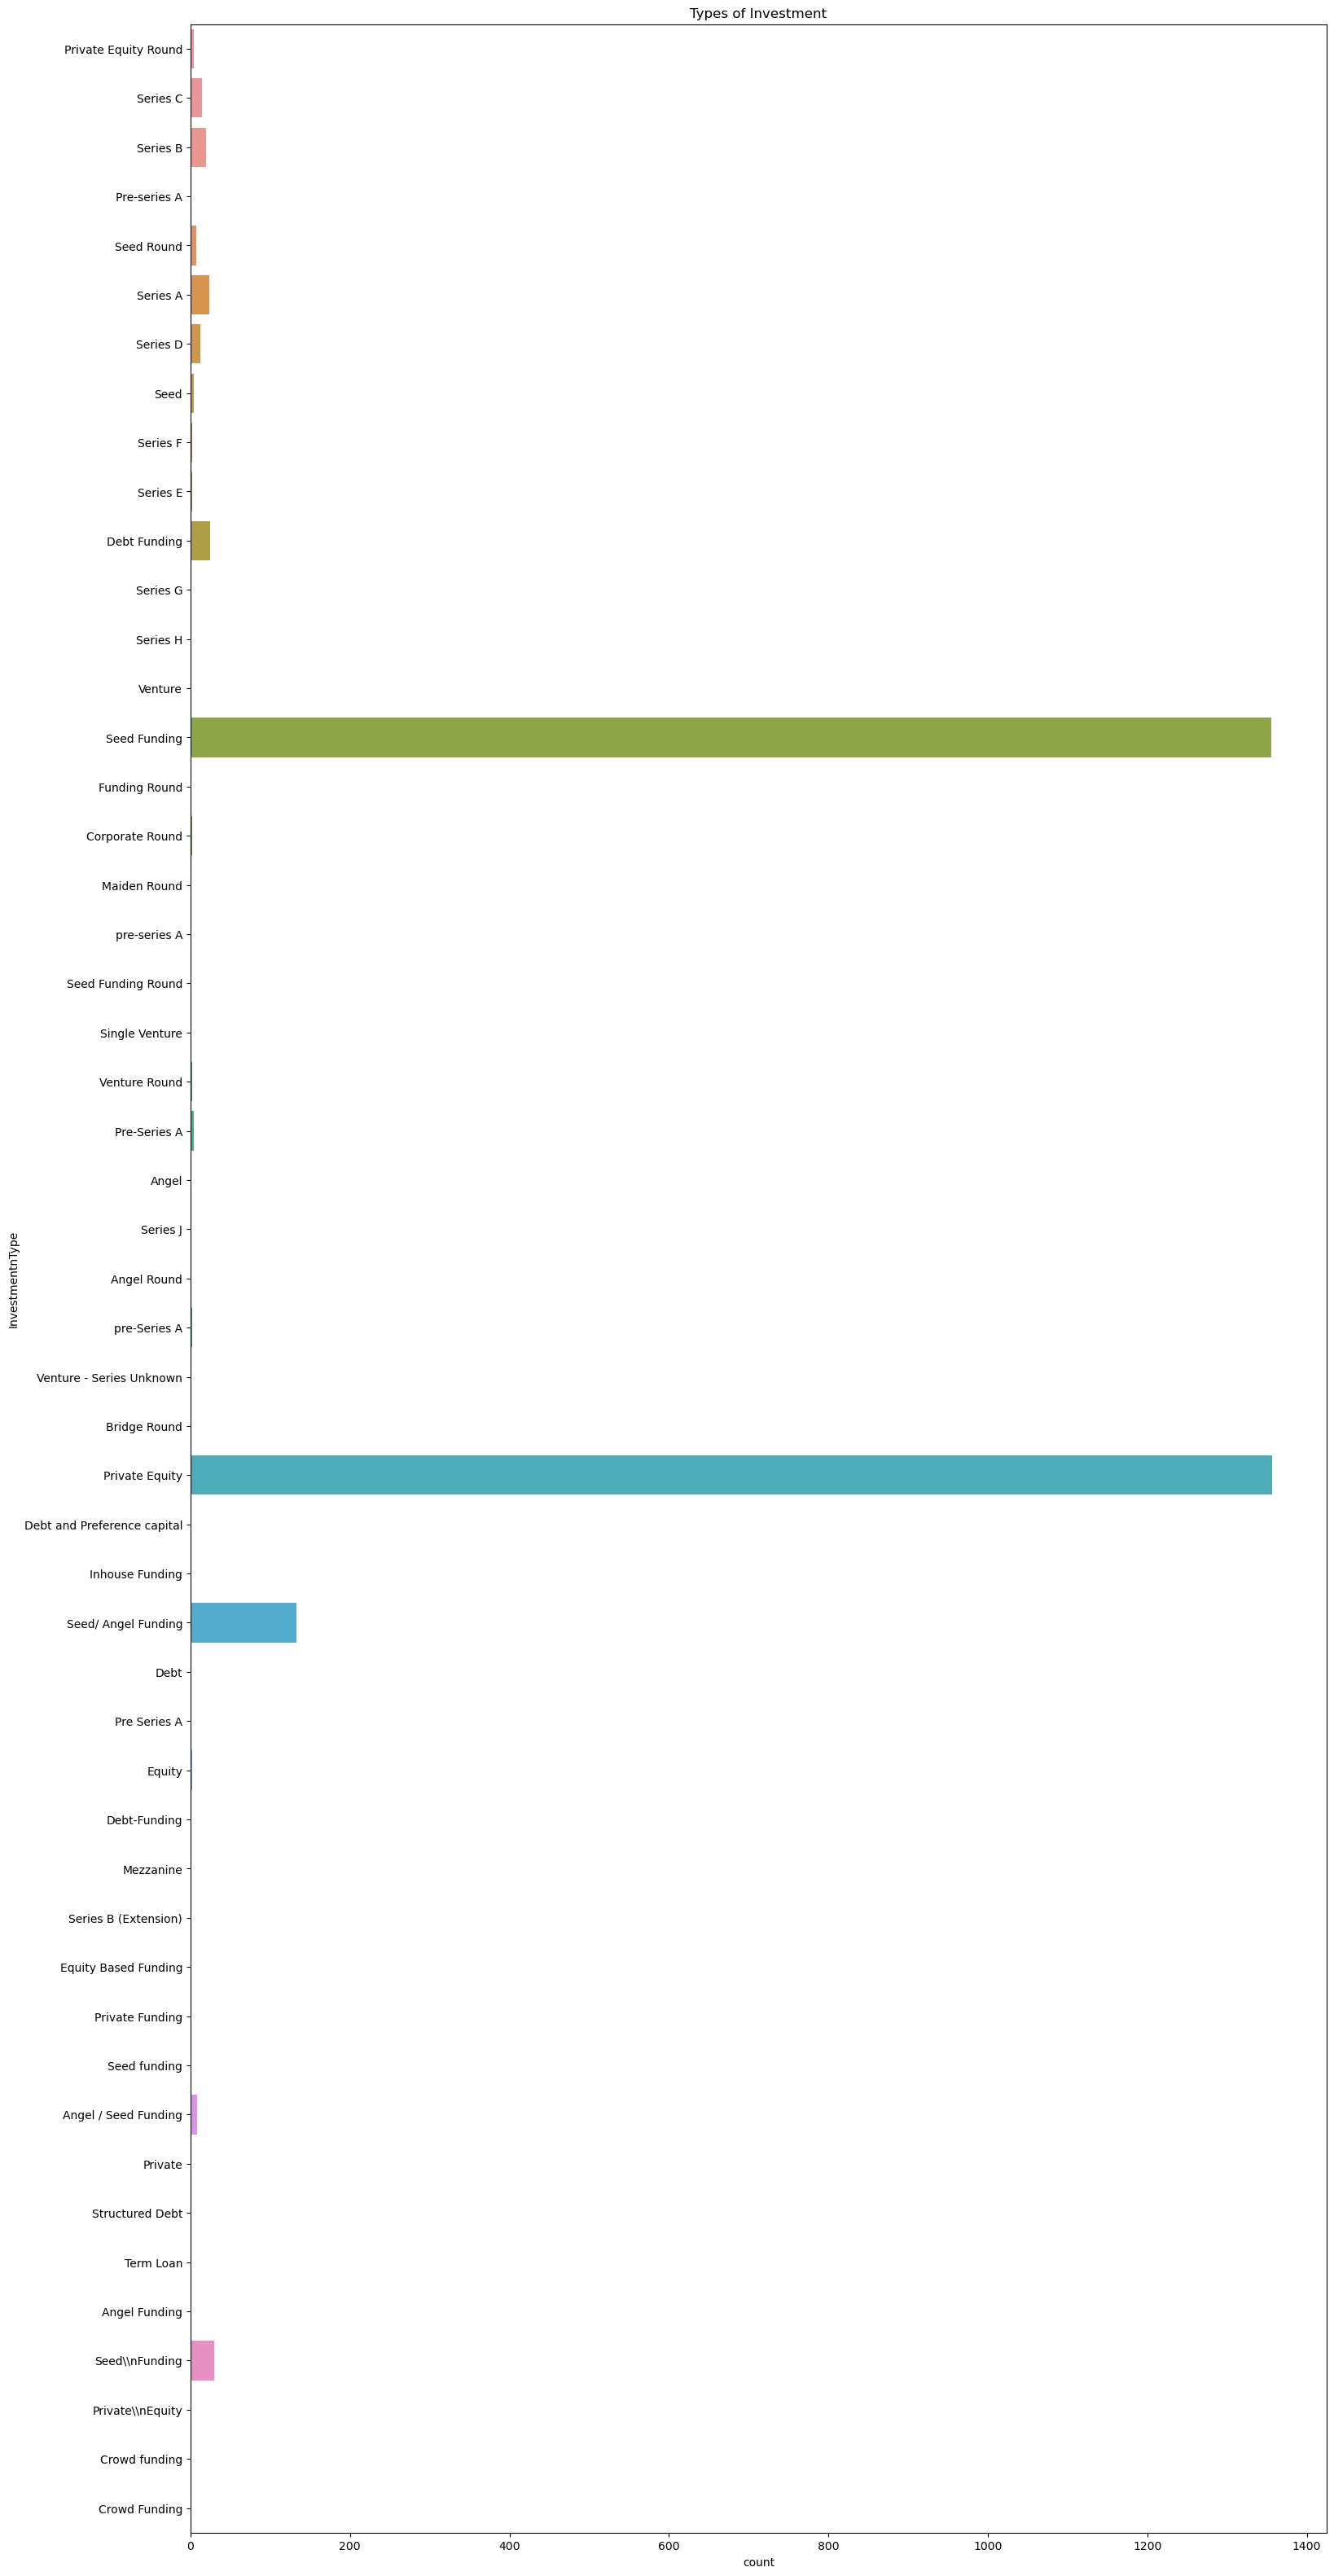

In [71]:
plt.figure(figsize=(18,40))
sns.countplot(data=df, y="InvestmentnType")
plt.title("Types of Investment")
plt.show()

In [72]:
# From the above graph we conclude that the type of investment given to startups is majorly Private Equity and Seed Funding. 
# After that the funding given is Seed/Angel Funding.

In [73]:
plt.figure(figsize=(40,400))
sns.boxplot(data=df,x="Amount in USD",y="Industry Vertical")

<AxesSubplot:xlabel='Amount in USD', ylabel='Industry Vertical'>

In [74]:
df_cat=df.select_dtypes(object)

In [75]:
df_num=df.select_dtypes("float64")

In [76]:
df_cat["Industry Vertical"].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [77]:
df_cat

Startup Name    Industry Vertical  \
0                           BYJU’S               E-Tech   
1                           Shuttl       Transportation   
2                        Mamaearth           E-commerce   
3     https://www.wealthbucket.in/              FinTech   
4                           Fashor  Fashion and Apparel   
...                            ...                  ...   
3039                    Printvenue                  NaN   
3040                      Graphene                  NaN   
3041                Mad Street Den                  NaN   
3042                     Simplotel                  NaN   
3043              couponmachine.in                  NaN   

                                SubVertical City  Location  \
0                                E-learning      Bengaluru   
1                 App based shuttle service        Gurgaon   
2     Retailer of baby and toddler products      Bengaluru   
3                         Online Investment      New Delhi   
4               Embroiled Clothes For Women         Mumbai   
...                                     ...            ...   
3039                                    NaN            NaN   
3040                                    NaN            NaN   
3041                                    NaN            NaN   
3042                                    NaN            NaN   
3043                                    NaN            NaN   

                         Investors Name       InvestmentnType  
0               Tiger Global Management  Private Equity Round  
1             Susquehanna Growth Equity              Series C  
2                 Sequoia Capital India              Series B  
3                        Vinod Khatumal          Pre-series A  
4               Sprout Venture Partners            Seed Round  
...                                 ...                   ...  
3039        Asia Pacific Internet Group        Private Equity  
3040                     KARSEMVEN Fund        Private Equity  
3041     Exfinity Fund, GrowX Ventures.        Private Equity  
3042                         MakeMyTrip        Private Equity  
3043  UK based Group of Angel Investors          Seed Funding  

[3044 rows x 6 columns]

In [78]:
df_num

Amount in USD
0      2.000000e+08
1      8.048394e+06
2      1.835886e+07
3      3.000000e+06
4      1.800000e+06
...             ...
3039   4.500000e+06
3040   8.250000e+05
3041   1.500000e+06
3042   1.840034e+07
3043   1.400000e+05

[3044 rows x 1 columns]

In [79]:
df_num["Amount in USD"].unique()

array([2.00000000e+08, 8.04839400e+06, 1.83588600e+07, 3.00000000e+06,
       1.80000000e+06, 9.00000000e+06, 1.50000000e+08, 6.00000000e+06,
       7.00000000e+07, 5.00000000e+07, 2.00000000e+07, 1.20000000e+07,
       3.00000000e+07, 5.90000000e+06, 2.00000000e+06, 2.31000000e+08,
       4.86000000e+05, 1.50000000e+06, 1.84003448e+07, 2.60000000e+07,
       1.74112650e+07, 1.30000000e+06, 1.35000000e+08, 3.00000000e+05,
       2.20000000e+08, 1.58000000e+07, 2.83000000e+08, 1.00000000e+09,
       4.50000000e+07, 5.85000000e+08, 4.50000000e+06, 3.30000000e+06,
       5.00000000e+06, 1.80000000e+07, 1.00000000e+06, 1.00000000e+07,
       4.50000000e+08, 1.60000000e+06, 1.40000000e+08, 3.80800000e+07,
       1.25000000e+08, 1.10000000e+07, 5.10000000e+07, 3.70000000e+07,
       5.00000000e+05, 1.10000000e+08, 1.50000000e+07, 6.59000000e+06,
       3.90000000e+09, 1.90000000e+07, 2.50000000e+06, 1.45000000e+05,
       6.00000000e+07, 1.60000000e+07, 5.75000000e+06, 3.19605000e+05,
      

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [82]:
le.fit_transform(df_cat["Industry Vertical"])

array([173, 736, 174, ..., 821, 821, 821])

In [83]:
df_cat["Industry Vertical"].value_counts()

Consumer Internet                        941
Technology                               478
eCommerce                                186
Healthcare                                70
Finance                                   62
                                        ... 
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
on-demand healthcare marketplace           1
Online Travel Marketplace                  1
Name: Industry Vertical, Length: 821, dtype: int64

In [84]:
df_cat["Investors Name"].value_counts()

Undisclosed Investors                                                                                                                                               39
Undisclosed investors                                                                                                                                               30
Ratan Tata                                                                                                                                                          25
Indian Angel Network                                                                                                                                                24
Kalaari Capital                                                                                                                                                     16
                                                                                                                                                                    .

In [85]:
from scipy.stats import skew

Amount in USD
26.855672472722254


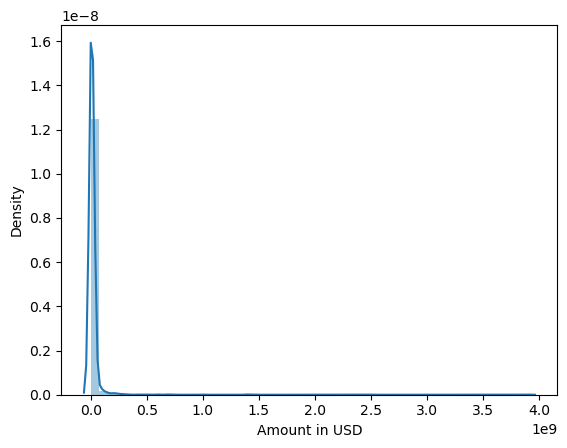

In [86]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [87]:
pd.get_dummies(df["Investors Name"])

"Kedaraa Capital, Ontario Teachers\\'"  021 Capita, Binny Bansal  \
0                                          0                         0   
1                                          0                         0   
2                                          0                         0   
3                                          0                         0   
4                                          0                         0   
...                                      ...                       ...   
3039                                       0                         0   
3040                                       0                         0   
3041                                       0                         0   
3042                                       0                         0   
3043                                       0                         0   

      1Crowd  1Crowd (through crowd funding)  1Crowd (through crowdfunding)  \
0          0                               0                              0   
1          0                               0                              0   
2          0                               0                              0   
3          0                               0                              0   
4          0                               0                              0   
...      ...                             ...                            ...   
3039       0                               0                              0   
3040       0                               0                              0   
3041       0                               0                              0   
3042       0                               0                              0   
3043       0                               0                              0   

      1Crowd, Ankur Capital  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   
...                     ...   
3039                      0   
3040                      0   
3041                      0   
3042                      0   
3043                      0   

      1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.  \
0                                                     0          
1                                                     0          
2                                                     0          
3                                                     0          
4                                                     0          
...                                                 ...          
3039                                                  0          
3040                                                  0          
3041                                                  0          
3042                                                  0          
3043                                                  0          

      3 undisclosed HNIs  3 undisclosed investors  3One4 Capital  ...  \
0                      0                        0              0  ...   
1                      0                        0              0  ...   
2                      0                        0              0  ...   
3                      0                        0              0  ...   
4                      0                        0              0  ...   
...                  ...                      ...            ...  ...   
3039                   0                        0              0  ...   
3040                   0                        0              0  ...   
3041                   0                        0              0  ...   
3042                   0                        0              0  ...   
3043                   0                        0              0  ...   

      mall Industries Development Bank of India (SIDBI)  \
0                                                     0   
1      

In [88]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [89]:
df_cat

Startup Name  Industry Vertical  SubVertical  City  Location  \
0              158                173          452              13   
1             1832                736           69              33   
2             1249                174         1582              13   
3             2391                237         1202              68   
4              642                232          497              61   
...            ...                ...          ...             ...   
3039          1610                821         1942             107   
3040           817                821         1942             107   
3041          1239                821         1942             107   
3042          1847                821         1942             107   
3043          2365                821         1942             107   

      Investors Name  InvestmentnType  
0               2103               23  
1               2036               36  
2               1843               34  
3               2291               20  
4               1978               29  
...              ...              ...  
3039             261               22  
3040            1024               22  
3041             608               22  
3042            1213               22  
3043            2160               27  

[3044 rows x 6 columns]

<AxesSubplot:>

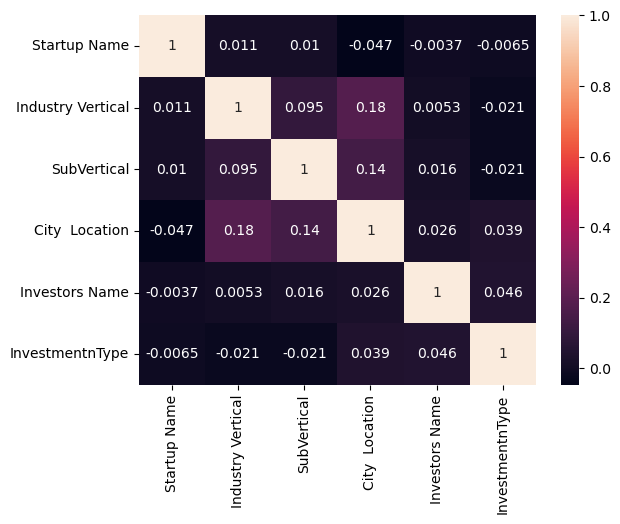

In [90]:
sns.heatmap(df_cat.corr(),annot=True)

Startup Name
-0.02579017484568781


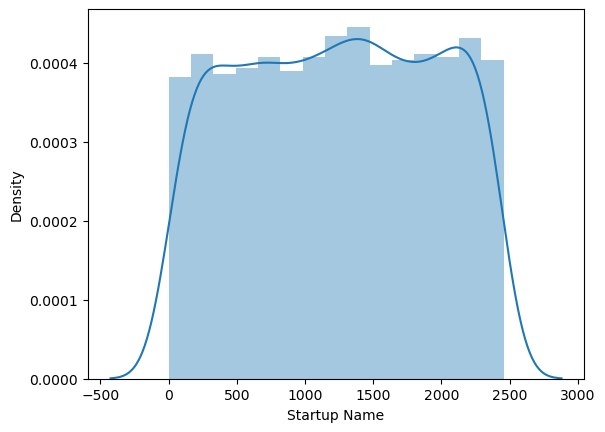

Industry Vertical
0.3016536879420696


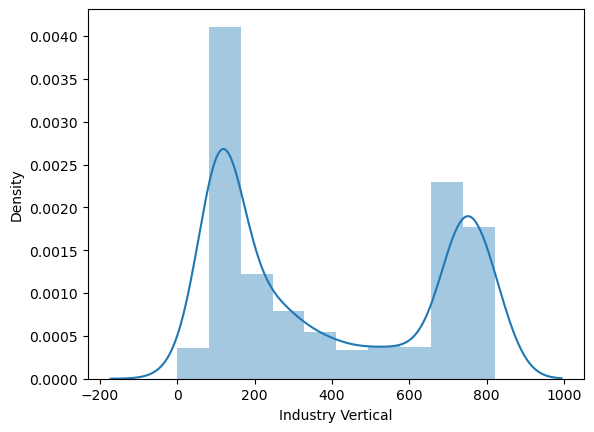

SubVertical
-0.4449146778290571


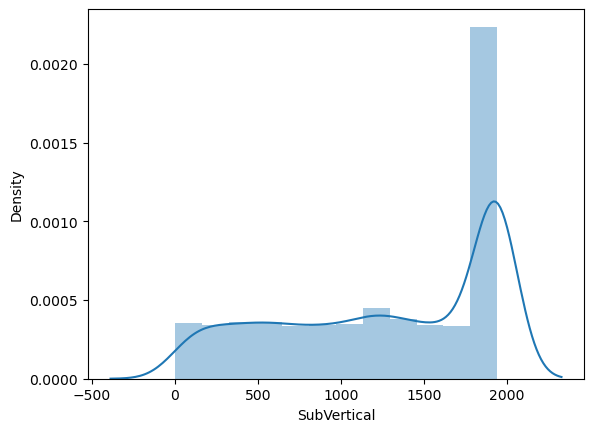

City  Location
0.22234109063056579


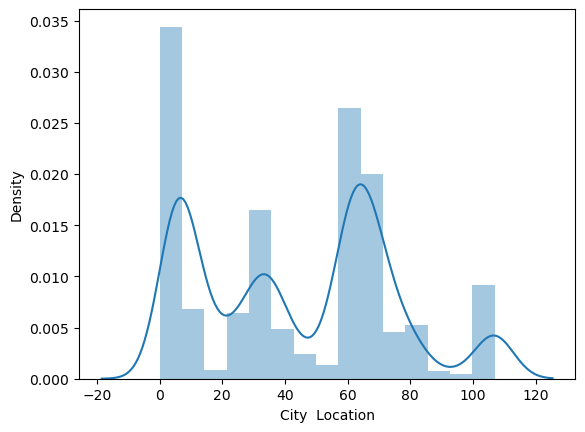

Investors Name
-0.0476514651585132


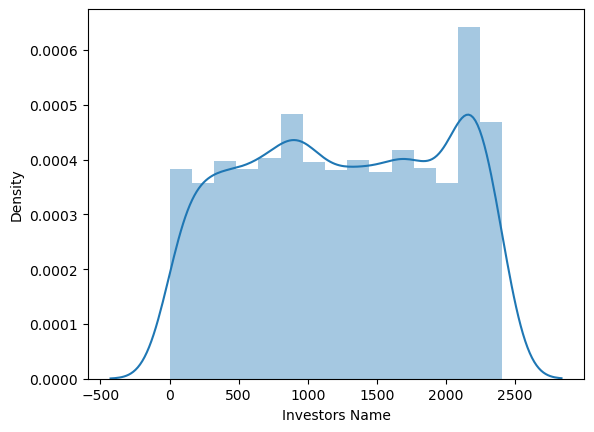

InvestmentnType
-0.09128443265601598


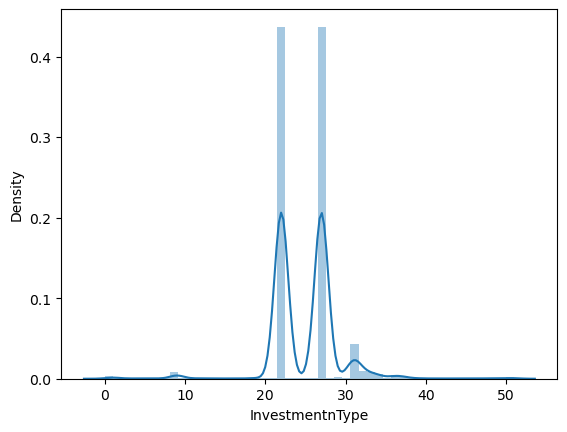

In [91]:
for col in df_cat:
    print(col)
    print(skew(df_cat[col]))
    
    plt.figure()
    sns.distplot(df_cat[col])
    plt.show()

In [92]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

# We have chosen the target column "Amount in USD"

In [93]:
features

Startup Name    Industry Vertical  \
0                           BYJU’S               E-Tech   
1                           Shuttl       Transportation   
2                        Mamaearth           E-commerce   
3     https://www.wealthbucket.in/              FinTech   
4                           Fashor  Fashion and Apparel   
...                            ...                  ...   
3039                    Printvenue                  NaN   
3040                      Graphene                  NaN   
3041                Mad Street Den                  NaN   
3042                     Simplotel                  NaN   
3043              couponmachine.in                  NaN   

                                SubVertical City  Location  \
0                                E-learning      Bengaluru   
1                 App based shuttle service        Gurgaon   
2     Retailer of baby and toddler products      Bengaluru   
3                         Online Investment      New Delhi   
4               Embroiled Clothes For Women         Mumbai   
...                                     ...            ...   
3039                                    NaN            NaN   
3040                                    NaN            NaN   
3041                                    NaN            NaN   
3042                                    NaN            NaN   
3043                                    NaN            NaN   

                         Investors Name       InvestmentnType  
0               Tiger Global Management  Private Equity Round  
1             Susquehanna Growth Equity              Series C  
2                 Sequoia Capital India              Series B  
3                        Vinod Khatumal          Pre-series A  
4               Sprout Venture Partners            Seed Round  
...                                 ...                   ...  
3039        Asia Pacific Internet Group        Private Equity  
3040                     KARSEMVEN Fund        Private Equity  
3041     Exfinity Fund, GrowX Ventures.        Private Equity  
3042                         MakeMyTrip        Private Equity  
3043  UK based Group of Angel Investors          Seed Funding  

[3044 rows x 6 columns]

In [94]:
target

0       2.000000e+08
1       8.048394e+06
2       1.835886e+07
3       3.000000e+06
4       1.800000e+06
            ...     
3039    4.500000e+06
3040    8.250000e+05
3041    1.500000e+06
3042    1.840034e+07
3043    1.400000e+05
Name: Amount in USD, Length: 3044, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.2)

In [100]:
df[(df["Investors Name"]=="Ratan Tata")]

Startup Name                                  Industry Vertical  \
347            The Print                                              Media   
1266               GOQii                                  Consumer Internet   
1367          IdeaChakki                                  Consumer Internet   
1590           Kyazoonga                                          eCommerce   
1717             Niki.ai                                         Technology   
1788            LensKart                                          eCommerce   
1926              Moglix                                          Ecommerce   
1933   Invictus Oncology                                         Healthcare   
1952            Snapbizz                                         Technology   
1968  Bollant Industries                                         Technology   
2001            Nestaway                                  Consumer Internet   
2006             DogSpot                                          ECommerce   
2014              Tracxn                                               BFSI   
2060            Cashkaro                                  Consumer Internet   
2072            FirstCry                                          ECommerce   
2089          Teabox.com                                          ECommerce   
2151           UrbanClap   Hyperlocal On-Demand Household Services platform   
2200               Sabse  WiFi \xe2\x80\x93 first Cloud communication pl...   
2268         Crayon Data                        Big Data Analytics Platform   
2386            HolaChef                             Food Delivery Platform   
2573            Ola Cabs                              Cab rental Mobile app   
2596              Ampere                      Electric Scooter manufacturer   
2685             KAARYAH                        Women Lifestyle Marketplace   
2890               Paytm                                                NaN   
2953        CarDekho.com                                                NaN   

                                            SubVertical      City  Location  \
347                                         News portal               Delhi   
1266                   Health & Fitness Wearable Device              Mumbai   
1367                  Restaurant Menu & Food mobile app               Delhi   
1590                    Online event ticketing Platform              Mumbai   
1717                   Artificial Intelligence Platform           Bangalore   
1788                          Eyewear etailing platform           New Delhi   
1926             Industrial & Home Products Marketplace           New Delhi   
1933                Cancer therapeutic Info & Solutions           New Delhi   
1952     Connectivity platform for local grocery stores           Bangalore   
1968         Eco-friendly consumer & packaging products           Hyderabad   
2001                     Online Home Rental Marketplace           Bangalore   
2006                                   Online Pet Store             Gurgaon   
2014  Startup Funding Deal Discovery & Execution pla...           Bangalore   
2060                         Coupon & Cashback platform             Gurgaon   
2072                               Kids Focused eTailer                Pune   
2089                              Specialty Tea ETailer            Siliguri   
2151                                                NaN             Gurgaon   
2200                                                NaN              Mumbai   
2268                                                NaN  Chennai/ Singapore   
2386                                                NaN              Mumbai   
2573                                                NaN           Bangalore   
2596                                                NaN          Coimbatore   
2685                                                NaN             Gurgaon   
2890                                                NaN      

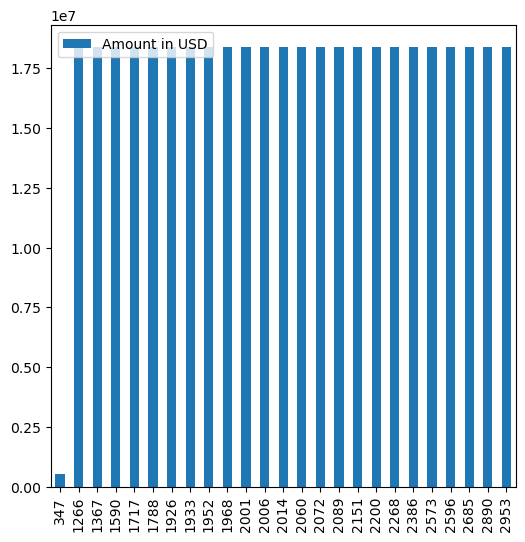

In [101]:
df[(df["Investors Name"]=="Ratan Tata")].plot(kind="bar",figsize=(6,6))
plt.show()

From the above bar graph we know that Mr. Ratan Tata has invested the least amount in startup The Print.
The amount invested in the rest of the startups is almost equal.

In [102]:
df[(df["Investors Name"]=="Sequoia Capital India")]

Startup Name  Industry Vertical                            SubVertical  \
2      Mamaearth         E-commerce  Retailer of baby and toddler products   
149    Blackbuck     Logistics Tech              Largest Trucking Platform   
925       Belong  Consumer Internet                      Online Jon Portal   

    City  Location         Investors Name  InvestmentnType  Amount in USD  
2        Bengaluru  Sequoia Capital India         Series B     18358860.0  
149      Bengaluru  Sequoia Capital India  Private Funding     14680000.0  
925      Bangalore  Sequoia Capital India   Private Equity     10000000.0

In [106]:
df_cat["Industry Vertical"]=np.sqrt(df_cat["Industry Vertical"])

In [107]:
skew(df_cat["Industry Vertical"])

0.09826455169153425

In [109]:
df_cat["City  Location"]=np.sqrt(df_cat["City  Location"])
skew(df_cat["City  Location"])

-0.5096192894087399

In [110]:
df_cat["Investors Name"]=np.sqrt(df_cat["Investors Name"])
skew(df_cat["Investors Name"])

-0.6138866483871362

In [111]:
!pip install pandas-profiling

In [112]:
df.duplicated()

# to get duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Length: 3044, dtype: bool

In [113]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]